In [11]:
import matplotlib.pyplot as plt

In [12]:
with open("names.txt", "r") as file:
    words = file.read()

words = words.splitlines()
print(f"Five first lines is: {words[:5]}")

Five first lines is: ['emma', 'olivia', 'ava', 'isabella', 'sophia']


In character language models some name (ie. Maya) is interpreted as:

- M is likely to come first ($P("M"|"")$ is higher than other letters)
- a is likely to come second if M is first ($P("a"|"M")$ is higher...)
- y is likely to come third if M is first and a is second ($P("y"|"Ma")$ is higher...)
- a is likely to come fourth if M is first, a is second and y is third ($P("a"|"May")$ is higher...)

## Bigram model

Bigrams are the simplest form of character language models. They are only concerned with consecutive pairs of letters. Each pair is called a bigram.

In [13]:
for word in words[:1]:
    for ch1, ch2 in zip(word, word[1:]):
        print(ch1, ch2)

e m
m m
m a


In order to understand where the start and end of a word is we need to add some special characters that will signalize that.

In [14]:
for word in words[:1]:
    w = ["<S>"] + list(word) + ["<E>"]
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

<S> e
e m
m m
m a
a <E>


The simplest method to build a statistical method using bigrams is just to count them. The ```.get(key, value)``` is a dictionary metod to return a value of a given key or set a given optional value if the key is not found.

In [15]:
b = {}
for word in words:
    w = ["<S>"] + list(word) + ["<E>"]
    for ch1, ch2 in zip(w, w[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

b = dict(sorted(b.items(), key=lambda x: x[1], reverse=True)) # sorting the bigrams by count

Top50 bigrams

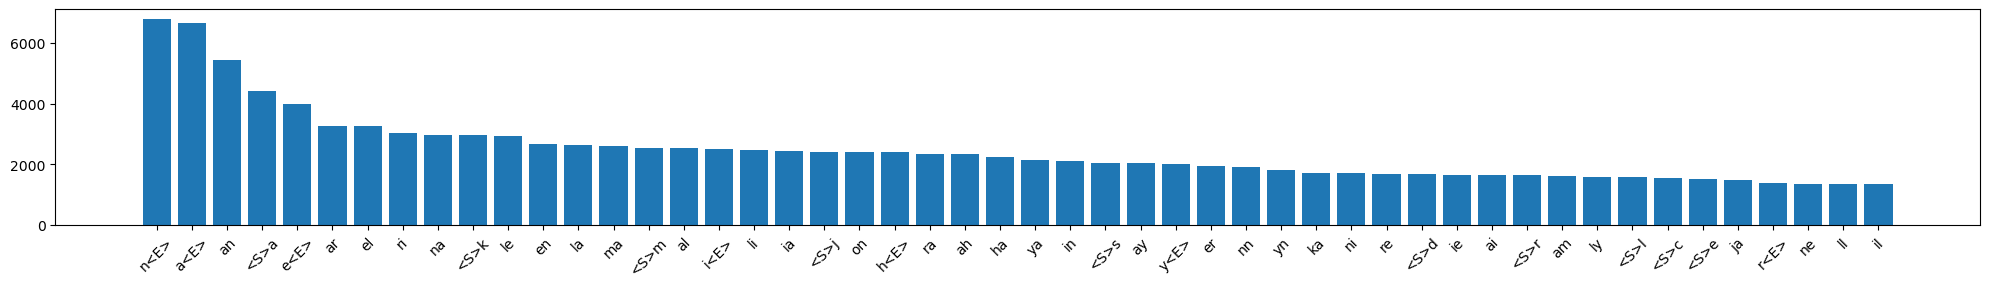

In [16]:
n = 50

plt.figure(figsize=(20, 3))
plt.bar([a+b for a, b in b.keys()][:n], list(b.values())[:n])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Using torch or numpy we can store this data more compactly. Imagine a cartesian product grid of all the characters in input data. As the indexes of a tensor are all integers we will also need a lookup table from a character to an index.

In [17]:
unique_chars = sorted(list(set("".join(words))))
stoi = {s:enum for enum, s in enumerate(unique_chars)}
stoi["<S>"] = 26
stoi["<E>"] = 27
stoi.items()

dict_items([('a', 0), ('b', 1), ('c', 2), ('d', 3), ('e', 4), ('f', 5), ('g', 6), ('h', 7), ('i', 8), ('j', 9), ('k', 10), ('l', 11), ('m', 12), ('n', 13), ('o', 14), ('p', 15), ('q', 16), ('r', 17), ('s', 18), ('t', 19), ('u', 20), ('v', 21), ('w', 22), ('x', 23), ('y', 24), ('z', 25), ('<S>', 26), ('<E>', 27)])

In [18]:
import numpy as np
import torch
import seaborn as sns

In [19]:
N = torch.zeros((28, 28), dtype=torch.int32)
for word in words:
    w = ["<S>"] + list(word) + ["<E>"]
    for ch1, ch2 in zip(w, w[1:]):
        ix1, ix2 = stoi[ch1], stoi[ch2]
        N[ix1, ix2] += 1

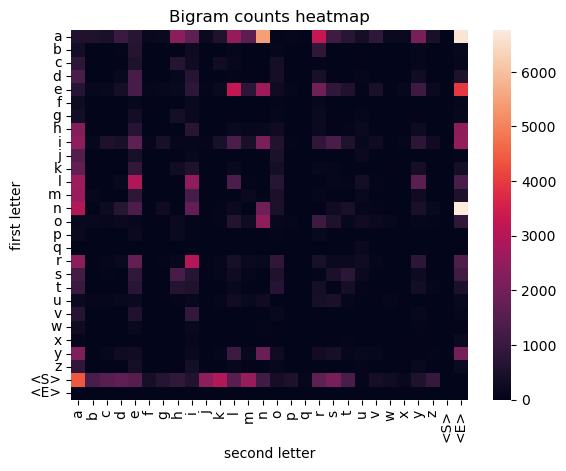

In [20]:
sns.heatmap(N, xticklabels=list(stoi.keys()), yticklabels=list(stoi.keys()))
plt.title("Bigram counts heatmap")
plt.xlabel("second letter")
plt.ylabel("first letter")
plt.show()